In [1]:
import requests
import json
import os
from WSMethods import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

In [9]:

osaFileName = '20210606\\initial_spectrum2.csv'

# 光スペアナで取得したデータを読み込む
spectrumCsvData = pd.read_csv(osaFileName, header=39)
print(spectrumCsvData)
spectrumData = np.array
spectrumData = spectrumCsvData

optFreq = spectrumData.values.T[0,:]
print(optFreq)
optSpectrum = spectrumData.values.T[1,:]
print(optSpectrum)

      198.74377   -74.006
0     198.74114   -72.850
1     198.73850   -73.565
2     198.73587   -73.495
3     198.73323   -73.034
4     198.73060   -72.338
...         ...       ...
3983  188.77227   -72.025
3984  188.76990   -72.338
3985  188.76752   -72.415
3986  188.76514   -72.434
3987  188.76277   -72.068

[3988 rows x 2 columns]
[198.74114 198.7385  198.73587 ... 188.76752 188.76514 188.76277]
[-72.85  -73.565 -73.495 ... -72.415 -72.434 -72.068]


-0.0026400000000137425


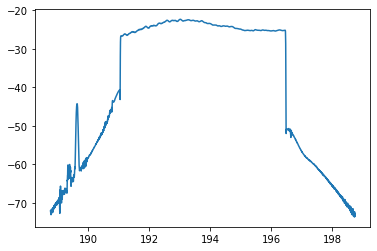

In [3]:
plt.plot(optFreq, optSpectrum)
print(optFreq[1] - optFreq[0])

In [15]:
# Define device IP
ip = '169.254.6.8'
# Get device info 
result = requests.get('http://' + ip + '/waveshaper/devinfo').json()

# Set frequency variables from device info
s = result['startfreq']
e = result['stopfreq']

In [16]:
print(s)
print(e)
wsFreq = np.arange(s, e + 0.001, 0.001)
print(wsFreq)

191.05
196.475
[191.05  191.051 191.052 ... 196.473 196.474 196.475]


In [33]:
f = interp1d(optFreq, optSpectrum, kind='cubic')
optSpectrumInterp = f(wsFreq)
maxPower = max(optSpectrumInterp)
normPower = -4
calb = 0 # yokuwakaranai

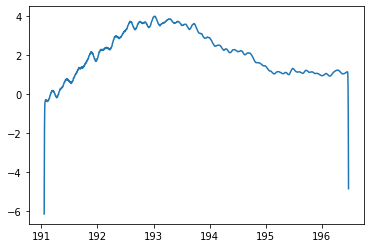

In [34]:
plt.plot(wsFreq, ((optSpectrumInterp - maxPower) - normPower)  - calb)

In [36]:

wsAttn = (optSpectrumInterp - maxPower) - normPower - calb
wsPhase = np.zeros(wsFreq.shape)
wsPort = np.ones(wsFreq.shape)
# Upload profile using created data
r = uploadProfile(ip, wsFreq, wsAttn, wsPhase, wsPort)

In [ ]:
np.savetxt("test.wsp", )